# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************


# 제 11-1강: 로지스틱 회귀 3

## 학습 목표
- 교차 엔트로피 손실함수를 이해한다.  
- 로지스틱 회귀 신경망의 역전파 계산한다.
- 소프트맥스 활성화 함수를 이해한다.
- 로지스틱 회귀 신경망을 구현한다. 

## 학습 내용
- 교차 엔트로피 손실함수와 제곱 합 오차함수의 비교
- 로지스틱 회귀의 역전파를 행렬로 계산하기
- 소프트맥스 활성화 함수를 이해하기
- 로지스틱 회귀 신경망에 구현하여 적용하기


## 1. 로지스틱 회귀 - 3층 신경망의 역전파
비용(오차)함수 를 미분한 값 즉 기울기와 비용을 이용하여 가중치를 조정해나가는 과정을 신경망의 역전파라고 앞에서 배웠습니다.  출력층에서 가까운 가중치부터 계산하여 조정하고, 그 다음에는 역순으로 계속해서 첫번째 은닉층에 사용한 가중치를 조정할 때까지 역전파를 계속해야 합니다.  

역전파는 신경망의 출력값 $\hat{y}$과 주어진 클래스 레이블 $y$과 비교하여 비용 $E$를 계산하여, 비용을 줄이는 작업을 해야 하는데, 이 비용(오차)를 줄이는 방법 중에 하나가 경사하강법입니다.  여기서는 크로스 엔트로피 비용함수를 미분하여 비용(오차)함수의 기울기를 구합니다. 기울기가 양수이면, 현재의 가중치를 줄이고, 기울기가 음수이면 가중치를 늘리는 작업을 반복하면서 비용함수의 최소값으로 수렴해가는 방법입니다. 출력층에 나타난 비용(오차)을 또한 그 앞에 층으로 계속해서 가중치에 비례 배분하여 전달하는 과정도 포함해야 합니다. 

이미 우리가 앞에서 본 바와 같이, 다음 그림에서 점선으로 표시된 부분이 역전파 과정을 보여줍니다.  

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/multi-layerNN-4.png?raw=true" width="700">
<center>그림 7: 다층 신경망의 역전파(편향과 학습률은 생략됨)</center>

위의 그림에서 정리된 대로 출력층과 은닉층의 역전파 행렬 계산법은 다음과 같습니다. 
\begin{align} 
E^{[2]} &= y - \hat{y}  \tag{15-1}\\
dZ^{[2]} &= E^{[2]} g^{[2]\prime}(Z^{[2]}) \tag{15-2} \\
dW^{[2]} &= dZ^{[2]} A^{[1]T} \tag{15-3} \\
db^{[2]} &= dZ^{[2]} \tag{15-4} \\
\\
E^{[1]} &= W^{[2]T}E^{[2]} \tag{16-1} \\
dZ^{[1]} &= E^{[1]}g^{[1]\prime}(Z^{[1]}) \tag{16-2} \\
dW^{[1]} &= dZ^{[1]} A^{[0]T}  \tag{16-3} \\
db^{[1]} &= dZ^{[1]}  \tag{16-4} \\
\end{align}

출력층에 손실함수를 적용하여 $dW^{[2]}$를 구하기 위하여, 우리가 앞에서 구한 크로스 엔트로피 손실함수의 미분 결과인 식(13)과 $\hat{y} = A^{[2]}$을 식(15)에 적용하면 그 결과는 다음과 같습니다. 다만, 학습률을 생략했고, 추가적으로 편향(bias)를 고려하였는데, 편향은 뉴론의 입력과 관계가 없으므로, 역전파할 때도 오차만 역전파하면 됩니다.  (사실상, 손실함수 J를 bias에 관하여 미분하면, 1이 남기 때문에, 이를 dZ2 즉 E2가 됩니다)

\begin{align}
E^{[2]} &= y - A^{[2]} \\
dZ^{[2]} &= E^{[2]} g^{[2]\prime}(Z^{[2]}) \\
         &= E^{[2]} \\
dW^{[2]} &= \frac{\partial E}{\partial W^{[2]}} \\
               &= \frac{1}{m}E^{[2]}\cdot A^{[1]T}  \\
               &= \frac{1}{m}dZ^{[2]}\cdot A^{[1]T}  \tag{17}\\
db^{[2]} &= \frac{1}{m} np.sum(dZ^{[2]}, axis=1) \\
db^{[2]} &= \frac{1}{m} np.sum(E^{[2]}, axis=1) \\
\end{align} 

출력층에서 계산한 오차를 은닉층에 역전파하는 과정에 있는 식(16-2)에 있는 쌍곡탄전트 미분식 $g^\prime(Z^{[1]})$을 먼저 계산해보면 다음과 같습니다. 

\begin{align}
g'(Z^{[1]}) &= tanh'(Z^{[1]})\\
                  &= 1 - tanh^2(Z^{[1]}) \\
\end{align}


이제 출력층에서 계산한 오차를 역전파하는 과정의 식(16)을 다음과 같은 행렬로 나타낼 수 있습니다. 다만, 학습률을 추가적으로 편향(bias)를 고려하였는데, 편향은 뉴론의 입력과 관계가 없으므로, 오차만 역전파하면 됩니다 

\begin{align} 
E^{[1]} &= W^{[2]T}E^{[2]} \\
dZ^{[1]} &= E^{[1]} * g^{[1]\prime}(Z^{[1]})  \qquad \because g'(\cdot) = tanh(\cdot) \\
         &= E^{[1]} * (1 - tanh^2(Z^{[1]}))  \qquad \because tanh'(x) = 1 - tanh^2(x) \\ \\
         &= E^{[1]} * (1 - A^{[1]2})     \qquad \because \qquad A^{[1]} = g(Z^{[1]}) = tanh(Z^{[1]}) \\ \\
dW^{[1]} &= dZ^{[1]} \cdot A^{[0]T}    \tag{18} \\
db^{[1]} &= np.sum(dZ^{[1]}, axis=1) \\
\end{align}

\begin{align} 
E^{[1]} &= W^{[2]T}E^{[2]} \\
dZ^{[1]} &= E^{[1]} * g^{[1]\prime}(Z^{[1]})   \\
         &= E^{[1]} * (1 - tanh^2(Z^{[1]}))   \\
         &= E^{[1]} * (1 - A^{[1]2})     \\
dW^{[1]} &= dZ^{[1]} \cdot A^{[0]T}   \\
db^{[1]} &= np.sum(dZ^{[1]}, axis=1) \\
\end{align}

__JoyTips__
- 여기서 $*$ 는 원소별 곱셈을 의미합니다.    
- 여기서 $b^{[1]}$의 형상은 (4, 1)이며, $b^{[2]}$ 형상은 (1, 1)입니다.  

__제곱 합 오차함수(MSE, 평균제곱오차 함수)와 크로스 엔트로피 손실함수의 차이__

오차함수나 손실(비용)함수를 미분하여 오차 혹은 손실(비용)을 최소로 하는 것은 사실상 같은 목적을 가진 함수입니다. 그러면, 두 함수의 차이는 무엇입니까?  

예를 들어 설명하자면, 오차함수는 회귀분석의 같은 경우에 모든 자료들의 오차를 모두 합하여 가장 작은 오차를 내는 판별식을 찾는 것을 목적으로 하는 반면에, 손실(비용)함수는 모든 자료들을 정확하게 분류하는데 목적을 두고 있기 때문에 자료의 종류나 신경망의 목적에 따라 어떠한 함수를 사용할 것인지 결정해야 합니다. 

그러면, MNIST데이터 셋일 경우에는 어떤 함수를 사용하는 것이 더 나을까요?  여러분이 먼저 답을 생각하고, 두 경우를 모두 구현하여 여러분의 생각을 검증해보면 어떨까요? 

-----------------------

## 2. 이항 분류를 위한 로지스틱 회귀 신경망의 구현

### 2.1 신경망의 정의
일반적으로 다음과 같은 방법으로 기계학습에 사용할 신경망을 정의합니다. 
1. 신경망의 구조를 정의합니다. 즉 입력과 출력의 수, 은닉층의 수, 각 층의 노드의 수
2. 신경망 모델의 파라미터들을 초기화 합니다. 
3. 다음 사항을 반복합니다. 
    - 순전파 구현
    - 비용함수 계산
    - 기울기 계산과 역전파 구현
    - 가중치 조정

### 2.2 신경망 클래스의 구현

이제 우리가 구현하는 신경망 클래스를 LogisticNeuron()이라고 부르겠습니다. LogisticNeuron()은 네개의 메소드로 구성되어 있습니다. 

1. `__init()__`: 객체를 생성할 때 호출되는 초기화 메소드, 대개 사용자가 직접 호출하지 않음.
2. `forpass()`: 정방향 전파를 계산하고, 각 층의 결과값을 반환합니다. `fit(), predcit()`메소드가 호출함.
2. `fit()`: 입력(학습)자료를 사용하여 신경망을 학습하고, 그 결과를 저장함. 
3. `predict()`: 이미 학습된 신경망에 새로운 자료를 보내면 신경망의 예측값을 반환함.

자, 그러면 코드를 한번 훝어본 후에 이러한 코드를 어떻게 사용하는지 먼저 살펴본 후, 코딩의 중요한 부분도 다루도록 하겠습니다. 

In [20]:
#%%writefile code/LogisticNeuron.py
# author: idebtor@gmail.com
# import external libraries
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np


class LogisticNeuron(object):
    """ implements logistic regression using cross entropy 
    Arguments:
    X -- dataset of shape (2, number of examples) or (n_x, m)
    Y -- "true" labels vector of shape (1, number of examples)
    n_x -- X.shape[0]
    n_h -- size of the hidden layer
    n_y -- Y.shape[0]
    eta -- learning rate
    epochs -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Saved: parameters learnt by the model. Some can can be used to predict.
    W1, W2, b1, b2 -- weights and bias
    cost_ -- a list of error in every epoch saved
    """
    def __init__(self, n_h, eta=0.2, epochs=1000, random_seed=1, print_cost=False):
        self.n_h = n_h         # size of hidden layer
        self.eta = eta         # learning rate
        self.epochs = epochs
        self.random_seed = random_seed
        self.print_cost = print_cost
        
    # Define the cost function A2, y
    def CEcost(self, A2, Y):
        logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
        cost = - np.sum(logprobs) / self.m_samples
        cost = np.squeeze(cost) 
        return cost   # makes sure cost is the dimension we expect. 
                      # E.g., turns [[17]] into 17 
 
    def forpass(self, X):
        """ 순전파 Z=WX, A=g(Z)를 계산하고 각 노드의 결과값 A1, A2를 반환합니다. """
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = joy.sigmoid(Z2)                  # yhat
        assert(A2.shape == (1, X.shape[1]))
        return A1, A2 
            
    def fit(self, X, Y):
        """순전파를 계산하고 역전파를 이용하여 모델을 최적화합니다"""
        self.m_samples = Y.shape[1] # number of example
        self.n_x = X.shape[0] # size of input layer
        self.n_y = Y.shape[0] # size of output layer
        # seed random numbers to make calculation deterministic 
        # initialize weights randomly with mean 0
        np.random.seed(self.random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1      
        self.b2 = np.zeros((self.n_y, 1))
        #print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        assert(X.shape[1] == Y.shape[1])
        self.cost_ = []
        
        # Loop (gradient descent)
        for i in range(0, self.epochs):
            # Forward propagation. 
            A0 = X
            A1, A2 = self.forpass(X)
            
            # Cost function: Compute the cross-entropy cost
            cost = self.CEcost(A2, Y)
            self.cost_.append(cost)
                        
            # Backpropagation. 
            E2 = Y - A2
            dZ2 = E2
            dW2 = np.dot(dZ2, A1.T)/self.m_samples 
            db2 = np.sum(dZ2, axis=1, keepdims=True)/self.m_samples
            
            E1 = np.dot(self.W2.T, E2)
            dZ1 = E1 * (1 - np.power(A1, 2))
            dW1 = np.dot(dZ1, A0.T)/self.m_samples
            db1 = np.sum(dZ1, axis=1, keepdims=True)/self.m_samples
            
            # Gradient descent parameter update.           
            self.W1 += self.eta * dW1
            self.b1 += self.eta * db1
            self.W2 += self.eta * dW2
            self.b2 += self.eta * db2
            
            # Print the cost every 100 iterations 
            if self.print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
                
        return self   
            
    def predict(self, X): 
        """이미 학습된 모델로 입력 X에 대한 예측값을 반환합니다.
        Arguments:
        X -- input data of size (n_x, m)
        Returns
        predictions -- vector of predictions of our model (red: 0 / blue: 1)
        """
        # Computes probabilities using forward propagation, and 
        # classifies to 0/1 using 0.5 as the threshold.
        A1, A2 = self.forpass(X)       
        assert(A2.shape == (1, X.shape[1]))
        predictions = A2 > 0.5                    # returns true or false 
        return predictions

\begin{align}   
  J(w) &= - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{10} 
\end{align}

### 2.3 신경망의 실행

기계학습을 하고자 할 때, 우리가 관심을 가져야 할 것은 신경망의 모델과 알고리즘, 그리고 신경망의 깊이와 노드의 수를 결정하는 것은 기본입니다. 본 강의에서는 딥러닝을 다루지 않기 때문에 은닉층을 하나만 생성합니다. 지금 우리가 결정해야 유일한 신경망 구조 부분은 은닉층의 노드 수입니다. 이와 관련한 세 개의 변수가 나옵니다. 

- n_x: 입력층의 크기(입력 자료에 근거하여 설정하므로 사용자에게 입력을 요청하지 않음)
- n_h: 은닉층의 크기(본 강의에서는 사용자가 4로 결정함)
- n_y: 출력층의 크기(입력 자료에 근거하여 설정하므로 사용자에게 입력을 요청하지 않음)

그러므로 사용자는 은닉층 노드의 수만 결정하면 다음과 같이 클래스 이름을 호출함으로 클래스 객체를 생성할 수 있습니다. 다음은 입력자료와 클래스 레이블로 `fit()` 메소드를 호출하여 신경망을 학습시키면 됩니다. n_x와 n_y의 값과 자료의 갯수는 입력 자료의 형상에 의하여 설정되므로, 사용자는 입력할 필요가 없어야 합니다. 또한 `assert()`함수를 사용하여 X, Y의 형상이 서로 적용 가능한지 체크하는 것도 좋은 옵션입니다. 

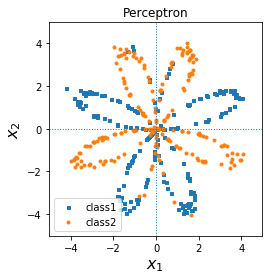

In [21]:
import joy

X, Y = joy.planar_data()            # X, Y = joy.noisy_moons()
joy.plot_xyw(X.T, Y.squeeze())
n_h = 4                            # 은닉층 노드의 수
nn = LogisticNeuron(n_h)             # 클래스 객체 nn을 생성함.
nn.fit(X, Y)                         # 입력 자료 X와 클래스 레이블 Y보내어 가중치를 구함.

### 2.4 신경망의 실행 결과의 시각화

우리는 입력자료를 모두 학습하는데 사용하였기 때문에 새로운 자료로 신경망을 테스트하거나 검증할 수 없습니다. 다만, 입력자료를 다시 신경망에 보내 얼마나 분류를 잘했는지, 그 정확도를 계산해보는 것은 상당한 의미가 있을 것입니다. 

plot_decision_regions()함수는 X 입력 자료에 대해 행$^{row}$벡터 형식의 요구하기에 때문에 X 를 전치합니다.  또한, plot_decision_regions()함수가 자체적으로 자료를 보내 예측값을 반환받을 수 있는 함수(call back function)를 요구하고 있습니다.  즉 nn.predict 메소드를 인자로 보내야 합니다.  nn.predict가 요구하는 입력자료의 형상을 맞추어 주기 익명함수를 도입하였습니다.  우리가 익명함수를 보내주었으므로, plot_decision_regions()함수는 nn.predict를 호출할 때, 익명함수가 받은 인자를 전치한 값으로 호출하게 됩니다.  

또한 계산할 수 있는 메소드(혹은 함수)의 신경망의 predict()메소드도 마찬가지  predict()함수도 마찬가지입니다. 

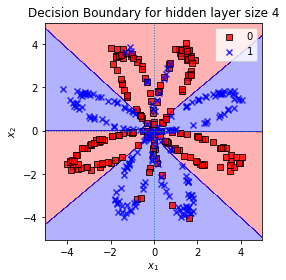

In [12]:
plt.title("Decision Boundary for hidden layer size " + str(nn.n_h))
joy.plot_decision_regions(X.T, Y, lambda z: nn.predict(z.T))

__JoyQuiz__: nn.predict(X)가 반환하는 값의 형식$^{type}$은 무엇입니까? 

__JoyQuiz__: nn.predict(X)가 반환하는 값의 형상$^{shape}$은 무엇입니까? 

### 2.5 신경망의 실행 결과의 정확도 계산

신경망의 실행 결과를 시각화하였지만, 분류의 정확도를 계산해보는 것도 필요합니다. 다음 코드는 입력 자료 X에 대한 분류의 정확도를 계산하고 출력합니다. 코드 설명이 있어야겠죠?

In [4]:
# Print accuracy
yhat = nn.predict(X)
print('Accuracy: {}%'.format(((Y * yhat).sum() + ((1 - Y) * (1 - yhat)).sum())/Y.size * 100))

Accuracy: 87.75%


각 자료에 대하여 `nn.predict()`가 반환하는 예측값이 있고, 또한 각 자료에 대한 정확한 값 즉 클래스 레이블 Y가 있습니다.  그러므로 예측의 정확도는 클래스 1을 1로 분류한 수와 클래스 0를 0로 정확하게 분류한 경우의 수를 더한 값을 전체 자료의 수로 나누면 다음과 같은 수식으로 정확도를 계산할 수 있습니다. 

\begin{align} accuracy = \frac{(good \ predictions\ for\ class\ 1) + 
  (good\ predicitions\ for\ class\ 0)}{total\ number\ of\ examples} \times 100 \end{align}

그런데, 여기서 문제는, `nn.predict()`가 반환하는 값을 `yhat`이라고 한다면, `yhat`의 값들이 `True/False` 형식이며, 반면에 Y의 값들은 1과 0로 구성되어 있다는 것입니다. 그러면, 어떻게 클래스 1을 1로 분류한 경우의 수를 계산할 수 있을까요? 

예를 들면, 다음과 같은 두 개의 Numpy 배열이 있다면,

`
 YH = [[True, True, False, False, False, True]]
 YY = [[1, 1, 1, 0, 1, 1]]
`

1을 1로 분류한 것은 3개이며, 0을 0으로 분류한 것은 1개입니다. 그러므로, 정확도는 4/6입니다. 

문제는 이것을 어떻게 코딩하느냐는 것입니다. 다행히 파이썬에서는 True는 1, False는 0로 간주하여 연산을 하기 때문에, `True * 0 = 0, True * 1 = 1, False * 1 = 0, False * 0 = 0` 입니다. 이를 코딩으로 구현하면 다음과 같습니다. 

`
(YH * YY).sum()` 혹은 `np.dot(YH, YY.T)`하면 1을 1로 분류한 경우의 수가 나옵니다. 

그러면, 0을 0으로 분류한 경우의 수는 어떻게 구할까요? 

어떤 값이든지 0 이나 False를 곱하면 0이 나오기 때문에 다른 방법을 취해야 합니다. 한 방법은 값을 반전하여 곱하고 합산하는 것입니다. 즉 `(1 - YH), (1 - YY)`은 `True/False`를 `False/True`로 반전하고, `1/0`를 `0/1`로 반전합니다. 이 두 식을 곱한 후에 합산하면, 0를 0로 분류한 경우의 수가 나오며, 이를 코딩하는 다음과 같습니다. 

`
((1 - YH) * (1 - YY)).sum()  혹은 np.dot(1 - YH, 1 - YY.T))
`

In [14]:
YH = np.array([[True, True, False, False, False, True]])
YY = np.array([[1, 1, 1, 0, 1, 1]])
print('1->1 =', (YH * YY).sum())
print('0->1 =', ((1 - YH) * (1 - YY)).sum())

1->1 = 3
0->1 = 1


In [15]:
# Print accuracy
yhat = nn.predict(X)
print('Accuracy: {}%'.format(((Y * yhat).sum() + ((1 - Y) * (1 - yhat)).sum())/Y.size * 100))
print('Accuracy: {}%'.format(float(np.dot(Y, yhat.T) + np.dot(1 - Y, 1 - yhat.T))/Y.size * 100))

Accuracy: 87.75%
Accuracy: 87.75%


### 2.6 신경망의 평균비용의 시각화

신경망을 학습하면서, 매회의 반복 학습마다 비용(평균 오차)를 저장해둔 값을 다음과 같은 간단한 코드로 시각화할 수 있습니다. 

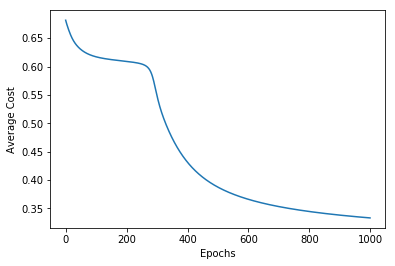

In [16]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

### 2.7 신경망의 하이퍼파라미터$^{hyperparameter}$

기계학습에는 언제나 다루어야 할 파라미터들이 많아서 그런지 그러한 파라미터들을 가리켜 하이퍼파라미터라고 부릅니다. LogisticNeuron() 클래스에도 몇 개가 보이는데, 은닉층의 뉴론의 수 n_h, 반복 횟수 epoch, 학습률 eta 등등 입니다. 다음은 이러한 하이퍼파라미터를 조정하면서 실행한 예제입니다.  은닉층의 뉴론이 많다고 해서 항상 성능이 향상되는 것은 아니라는 것을 알 수 있습니다. 

[0] Processing 2 layers case....
[1] Processing 3 layers case....
[2] Processing 4 layers case....
[3] Processing 8 layers case....
[4] Processing 16 layers case....
[5] Processing 32 layers case....
[6] Processing 64 layers case....
[7] Processing 128 layers case....


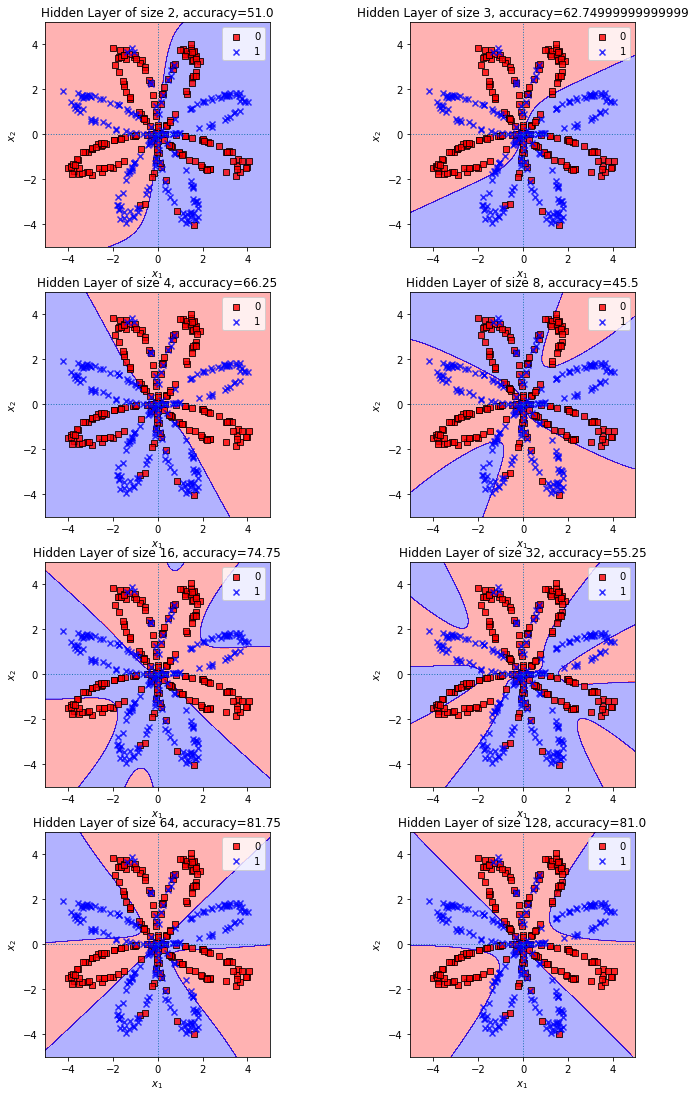

In [17]:
# This may take about 2 minutes to run
plt.figure(figsize=(12, 24))
hidden_layer_sizes = [2, 3, 4, 8, 16, 32, 64, 128]
for i, n_h in enumerate(hidden_layer_sizes):
    print('[{}] Processing {} layers case....'.format(i, n_h))
    plt.subplot(5, 2, i+1)
    nn = LogisticNeuron(n_h, eta = 0.01, epochs = 100)
    nn.fit(X, Y)
    joy.plot_decision_regions(X.T, Y, lambda x: nn.predict(x.T))
    yhat = nn.predict(X)
    accuracy = float(np.dot(Y, yhat.T) + np.dot(1 - Y, 1 - yhat.T))/Y.size * 100
    plt.title('Hidden Layer of size {}, accuracy={}'.format(n_h, accuracy))

Processing different number of neurons cases ......................................................................................................

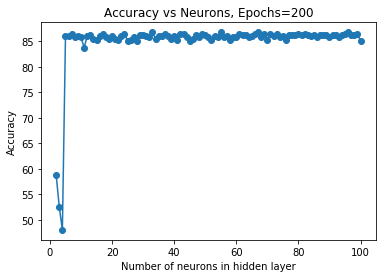

In [18]:
# This may take about 2 minutes to run
accuracy = []
number_of_neurons = [n for n in np.arange(2, 101)]
print('Processing different number of neurons cases ...', end='')
for i, n_h in enumerate(number_of_neurons):
    print('.', end='')
    nn = LogisticNeuron(n_h, eta = 0.1, epochs = 200)
    nn.fit(X, Y)
    yhat = nn.predict(X)
    accuracy.append(float(np.dot(Y, yhat.T) + np.dot(1 - Y, 1 - yhat.T))/Y.size * 100)
    
plt.title('Accuracy vs Neurons, Epochs={}'.format(nn.epochs))
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Accuracy')
plt.plot(number_of_neurons, accuracy, marker='o')

## 3. 이항 분류를 위한 자료들

사이킷런$^{scikit-learn}$에서 제공하는 다양한 자료들을 소개합니다. 우리가 위에서 공부한 로지스틱 회귀를 실험해볼 수 있는 자료들입니다. 

X.shape=(2, 200), Y.shape=(1, 200)


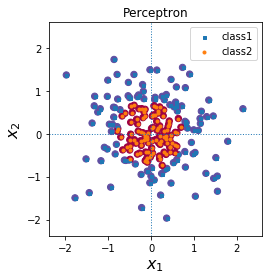

In [13]:
import joy
#X, Y = joy.noisy_circles()
#X, Y = joy.noisy_moons()
#X, Y = joy.blobs()
X, Y = joy.gaussian_quantiles()
print("X.shape={}, Y.shape={}".format(X.shape, Y.shape))

#plt.scatter(X[0, :], X[1, :], c=Y.squeeze(), s=40, cmap=plt.cm.Spectral);
joy.plot_xyw(X.T, Y.squeeze())

Text(0.5,1,'Decision Boundary for hidden layer size 4')

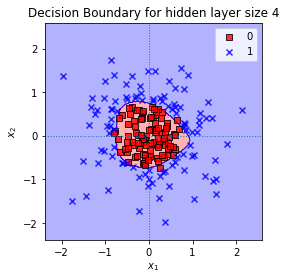

In [14]:
# Build a model with a n_h-dimensional hidden layer
nn = LogisticNeuron(4, epochs = 5000, print_cost=True)
nn.fit(X, Y)

# Plot the decision boundary
#joy.plot_decision_boundary(X, Y, lambda x: nn.predict(x.T))
joy.plot_decision_regions(X.T, Y.squeeze(), lambda x: nn.predict(x.T))
plt.title("Decision Boundary for hidden layer size " + str(nn.n_h))

__JoyExercise__:
1. 로지스틱 회귀에서, 입력 자료 x를 클래스 레이블 $y \in \{0, 1\}$로 이항 분류하는 가설함수 h(z)에 대한 비용함수는 다음과 같이 정의할 수 있습니다. 
\begin{align}  cost(h(z),y) = \begin{cases}
   -\log\left(h(z)\right)  \qquad \text{if y = 1}  \\
   -\log\left(1- h(z)\right) \ \ \text{if y = 0} \\
  \end{cases} 
\end{align}
다음에서 설명 중에서 맞는 것은?

(1) 만약 h(z) = y 이라고 한다면, y = 0, 또는 y = 1 일때 모두 cost(h(z), y) = 0 입니다. <br>
(2) 만약 y = 0 이라고 한다면, h(z)가 1에 수렴할수록 cost(h(z), y)의 값은 무한대로 커집니다.  <br>
(3) y = 0 혹은 y = 1 이든지 상관없이, h(z) = 0.5 이면 cost(h(z), y) = 0입니다. <br>

__JoyAnswer__: (1) & (2)

## 4. 손실함수 도식화 (참고자료)

In [153]:
def g(x):    # activation function
    return 1/(1 + np.exp((-x)))

def g_prime(x):  # gradient or sigmoid derivative
    return g(x) * (1 - g(x))

def cost(X, Y, W1, W2, epochs = 1):
    """ 
    X: input dataset in row vector style, 
    Y: class labels
    W1, W2: weights, its shape is (3, 1)
    """
    cost_ = []
    m = X.shape[1]

    for iter in range(epochs):
        A0 = X                        # to be consistant 
        Z1 = np.dot(W1, A0)           # hidden layer input
        A1 = g(Z1)                    # hidden layer output
        Z2 = np.dot(W2, A1)           # output layer input
        A2 = g(Z2)                    # output layer results

        E2 = Y - A2                        # error @ output
        E1 = np.dot(W2.T, E2)         # error @ hidden

        # multiply the error by the sigmoid slope at the values in Z? or A?
        dZ2 = E2 * g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
        dZ1 = E1 * g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  

        W2 +=  np.dot(dZ2, A1.T)      # update output layer weights
        W1 +=  np.dot(dZ1, A0.T)      # update hidden layer weights
        cost_.append(np.sqrt(np.sum(E2 * E2)))
    return np.sum(cost_) 

<function matplotlib.pyplot.show>

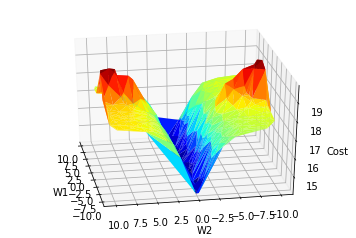

In [154]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#X = np.array([ [0, 0, 1, 1], [0, 1, 0, 1] ])   # input dataset - col vector     
#Y = np.array([0, 1, 1, 0])                     # class labels  - for rcolvector 

X, Y = joy.planar_data()   

W1 = np.random.permutation(np.linspace(-10, 10, 500))
W2 = np.random.permutation(np.linspace(-10, 10, 500))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
zs = [cost(X, Y, w1, w2) for w1, w2 in zip(W1, W2)]
ax.plot_trisurf(W1, W2, zs, linewidth=0.02, cmap=cm.jet)
ax.azim = 170
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('Cost')
plt.show

Final prediction of all
[0 0] [0.077]
[0 1] [0.935]
[1 0] [0.94]
[1 1] [0.042]


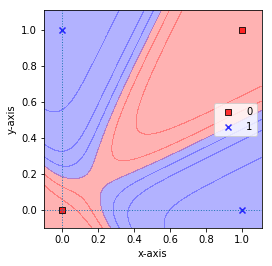

In [128]:
nn = joy.NeuralNetwork(net_arch=[2, 4, 1], epochs=10000)
X = np.array([ [0, 0, 1, 1], [0, 1, 0, 1] ])   # input dataset - col vector     
Y = np.array([0, 1, 1, 0])                     # class labels  - for rcolvector  

nn.fit(X, Y)                                         # train the net

print("Final prediction of all")
A2 = nn.predict(X.T)
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

joy.plot_decision_regions(X.T, Y, nn)   
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='best')
plt.show()

## Logistic Regression:Cross entropy with SGD


## 5. 로지스틱 회귀 구현: 교차 엔트로피를 이용한 경사하강법

여기서 사용한 경사하강법은 학습자료를 하나씩 사용할 때마다 손실을 계산하여 매개변수들을 갱신하며 신경망을 학습하는 방법을 사용하였습니다. 이를 확률적(stochastic) 경사하강법이라고 하며, 이러한 경사하강법의 변형에 대해서는 11-3강에서 좀 더 자세히 다룰 예정입니다. 

In [21]:
%%writefile code/LogisticNeuron_stochastic.py
#%load code/LogisticNeuron_stochastic.py
# author: idebtor@gmail.com
# import external libraries
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

class LogisticNeuron_stochastic(object):
    """implements Logistic Regression using cross entropy with stochastic gradient descent"""
    def __init__(self, n_x, n_h, n_y, eta = 0.2, epochs = 5, random_seed=1):
        self.n_x = n_x
        self.n_h = n_h
        
        
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
        np.random.seed(self.random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1      
        self.b2 = np.zeros((self.n_y, 1))
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  
        
    def CEcost(self, A2, Y):
        m = Y.shape[1]      # number of example
        logprobs = np.multiply(Y, np.log(A2))
        cost = -np.sum(logprobs)/m
        cost = np.squeeze(cost)        
        return cost  
    
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0) + self.b1         
        A1 = self.g(Z1)                          
        Z2 = np.dot(self.W2, A1) + self.b2       
        A2 = self.softmax(Z2)                   
        return Z1, A1, Z2, A2

    def fit(self, X, y): 
        self.cost_ = []
        self.m_samples = len(y)
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
               
        for epoch in range(self.epochs):           
            for sample in range(self.m_samples):            
                A0 = np.array(X[sample], ndmin=2).T  
                Y0 = np.array(Y[sample], ndmin=2).T  

                Z1, A1, Z2, A2 = self.forpass(A0)          # forward pass
                
                # Cost function: Compute the cross-entropy cost
                cost = self.CEcost(A2, Y0)
                self.cost_.append(cost)
                # Backpropagation. 
                E2 = Y0 - A2                
                dZ2 = E2 
                dW2 = np.dot(dZ2, A1.T) / self.m_samples
                db2 = np.sum(dZ2, axis=1, keepdims=True) / self.m_samples
                
                E1 = np.dot(self.W2.T, E2)  
                dZ1 = E1 * self.g_prime(Z1)  #sigmoid
                #dZ1 = E1 * (1 - np.power(A1, 2)) #tanh
                dW1 = np.dot(dZ1, A0.T) 
                db1 = np.sum(dZ1, axis=1, keepdims=True) 
                
                # update weights 
                self.W1 += self.eta * dW1 
                self.b1 += self.eta * db1 
                self.W2 += self.eta * dW2 
                self.b2 += self.eta * db2 
            print('Training epoch {}/{}, cost = {}'.format(epoch+1, self.epochs, cost))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2  

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):           # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def softmax(self, a):           # prevent it from overlfow and undeflow
        exp_a = np.exp(a - np.max(a))
        return exp_a / np.sum(exp_a)
    
    def evaluate(self, Xtest, ytest):   # fully vectorized calculation
        m_samples = len(ytest)  
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores = np.sum(yhat == ytest)
        return scores/m_samples * 100
        
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = self.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1
        return scores/m_samples * 100

Overwriting code/LogisticNeuron_stochastic.py


## Logistic Regression:Cross entropy with SGD

## 6.1 로지스틱 회귀 실행: 교차 엔트로피를 이용한 경사하강법

In [8]:
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = LogisticNeuron_stochastic(784, 100, 10, 
                           eta = 0.2, epochs = 3)  
nn.fit(X, y)       
self_accuracy = nn.evaluate(X, y)
test_accuracy = nn.evaluate(Xtest, ytest)
print('self_accuracy=', self_accuracy)  # 96.265
print('test_accuracy=', test_accuracy)  # 94.94

Training epoch 1/3, cost = 0.5771204321646319
Training epoch 2/3, cost = 0.5737357698526901
Training epoch 3/3, cost = 0.5551683651406998
self_accuracy= 96.265
test_accuracy= 94.94


## 6.2 로지스틱 회귀 실행:  에폭의 증가에 따른 정확도 분석

__아래 코드는 컴퓨터의 성능에 따라 다르겠지만, 일반적인 노트북의 경우 여러 시간이 걸릴 수 있습니다. 시간을 단축하기 위하여 에폭의 수를 아래와 같이 조정하면 됩니다.__

`epoch_list = np.arange(1, 11)` 

`epoch_list = np.arange(1, 31, 3)`

In [20]:
(X, y), (Xtest, ytest) = joy.load_mnist()
self_accuracy = []
test_accuracy = []
epoch_list = np.arange(1, 31)
for e in epoch_list:
    nn = LogisticNeuron_stochastic(784, 100, 10, 
                               eta = 0.2, epochs = e)  
    nn.fit(X, y)       
    self_accuracy.append(nn.evaluate(X, y))  
    test_accuracy.append(nn.evaluate(Xtest, ytest))

Training epoch 1/1, cost = 0.6030753688254945
Training epoch 1/2, cost = 0.6030753688254945
Training epoch 2/2, cost = 0.5487202658185626
Training epoch 1/3, cost = 0.6030753688254945
Training epoch 2/3, cost = 0.5487202658185626
Training epoch 3/3, cost = 0.563116486742796
Training epoch 1/4, cost = 0.6030753688254945
Training epoch 2/4, cost = 0.5487202658185626
Training epoch 3/4, cost = 0.563116486742796
Training epoch 4/4, cost = 0.5933841742745642
Training epoch 1/5, cost = 0.6030753688254945
Training epoch 2/5, cost = 0.5487202658185626
Training epoch 3/5, cost = 0.563116486742796
Training epoch 4/5, cost = 0.5933841742745642
Training epoch 5/5, cost = 0.596503154716515
Training epoch 1/6, cost = 0.6030753688254945
Training epoch 2/6, cost = 0.5487202658185626
Training epoch 3/6, cost = 0.563116486742796
Training epoch 4/6, cost = 0.5933841742745642
Training epoch 5/6, cost = 0.596503154716515
Training epoch 6/6, cost = 0.5940594026414966
Training epoch 1/7, cost = 0.60307536882

Training epoch 6/19, cost = 0.5940594026414966
Training epoch 7/19, cost = 0.5905355121592542
Training epoch 8/19, cost = 0.5871559161396952
Training epoch 9/19, cost = 0.5931709816848818
Training epoch 10/19, cost = 0.5940829219495751
Training epoch 11/19, cost = 0.5946309954178646
Training epoch 12/19, cost = 0.5984456878566812
Training epoch 13/19, cost = 0.6032218253562172
Training epoch 14/19, cost = 0.6092515856869801
Training epoch 15/19, cost = 0.6148411181434446
Training epoch 16/19, cost = 0.620164627548576
Training epoch 17/19, cost = 0.625790101770539
Training epoch 18/19, cost = 0.6296785326355576
Training epoch 19/19, cost = 0.6335004276512722
Training epoch 1/20, cost = 0.6030753688254945
Training epoch 2/20, cost = 0.5487202658185626
Training epoch 3/20, cost = 0.563116486742796
Training epoch 4/20, cost = 0.5933841742745642
Training epoch 5/20, cost = 0.596503154716515
Training epoch 6/20, cost = 0.5940594026414966
Training epoch 7/20, cost = 0.5905355121592542
Trainin

Training epoch 25/26, cost = 0.6464409713657054
Training epoch 26/26, cost = 0.6466912936454162
Training epoch 1/27, cost = 0.6030753688254945
Training epoch 2/27, cost = 0.5487202658185626
Training epoch 3/27, cost = 0.563116486742796
Training epoch 4/27, cost = 0.5933841742745642
Training epoch 5/27, cost = 0.596503154716515
Training epoch 6/27, cost = 0.5940594026414966
Training epoch 7/27, cost = 0.5905355121592542
Training epoch 8/27, cost = 0.5871559161396952
Training epoch 9/27, cost = 0.5931709816848818
Training epoch 10/27, cost = 0.5940829219495751
Training epoch 11/27, cost = 0.5946309954178646
Training epoch 12/27, cost = 0.5984456878566812
Training epoch 13/27, cost = 0.6032218253562172
Training epoch 14/27, cost = 0.6092515856869801
Training epoch 15/27, cost = 0.6148411181434446
Training epoch 16/27, cost = 0.620164627548576
Training epoch 17/27, cost = 0.625790101770539
Training epoch 18/27, cost = 0.6296785326355576
Training epoch 19/27, cost = 0.6335004276512722
Train

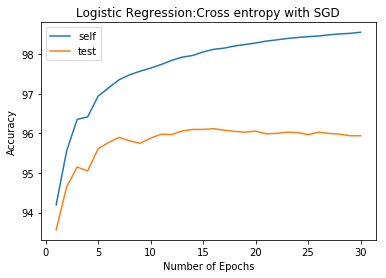

In [22]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Regression:Cross entropy with SGD')
plt.legend(loc='best')
plt.show()

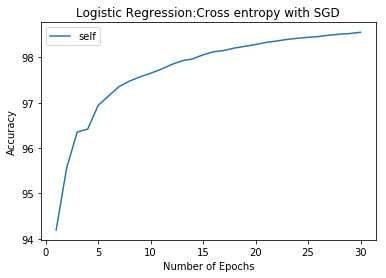

In [23]:
plt.plot(epoch_list, self_accuracy, label='self')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Regression:Cross entropy with SGD')
plt.legend(loc='best')
plt.show()

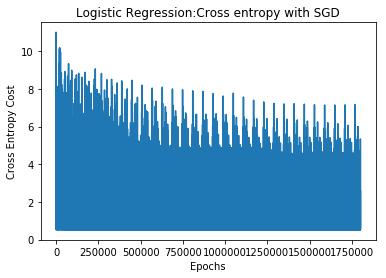

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Cost')
plt.title('Logistic Regression:Cross entropy with SGD')
plt.show()

## 학습 정리
- 교차 엔트로피 손실함수의 이해하기
- 로지스틱 회귀의 역전파를 행렬로 계산하기
- 소프트맥스 활성화 함수 이해하기
- 로지스틱 회귀 신경망 구현하기


### 참고자료
- https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression
- http://bcho.tistory.com/1142
- https://www.coursera.org/learn/machine-learning/lecture/wlPeP/classification

-------
_Rejoice always, pray continually, give thanks in all circumstances; for this is God’s will for you in Christ Jesus. (1 Thes 5:16-18)_